In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Import Data

In [2]:
DF_PATH = '../data/raw/'
df_food = pd.read_csv(DF_PATH + 'food_reviews.csv')
df_electronic = pd.read_csv(DF_PATH + 'electronic_reviews.csv')
df_fashion = pd.read_csv(DF_PATH + 'fashion_reviews.csv')

In [3]:
df_food.head()

,rating,reviews
0,5.0,Jenis:sp pengembang\nHarga:murah\nKualitas:bai...
1,5.0,"Masya Alloh,, pengiriman cepet,, pengemasan ra..."
2,5.0,Pengiriman cepat pengemasan cepat hrga murah e...
3,5.0,Harga:Terjangkau\nKualitas:Bagus\nJenis:Pengem...
4,5.0,Jenis:koepoe koepoe baking mix s p pengemulsi\...


In [4]:
df_electronic.head()

,rating,reviews
0,5.0,Sesuai ekspektasi banget sih ini. Warnanya can...
1,5.0,"Alhamdulillah paket nya sudah sampai dgn aman,..."
2,5.0,"Paket sudah sampai, warna nya cantik banget he..."
3,5.0,bagusss bangettt beli pas lagi promoo tapi ga ...
4,5.0,"Produk ori miniso, barang bagus, nyampe dengan..."


In [5]:
df_fashion.head()

,rating,reviews
0,5.0,Sumpah baguus bangeeet doong ... Agak kebesar...
1,5.0,Alhamdulilah paket sudah sampai\nMasya Allah b...
2,5.0,Barang sudah sampai sesuai pesanan ukuran 34 m...
3,5.0,"BAGUS BANGET LOHHH, monangissss harga murce ba..."
4,5.0,Assalamu'alaikum wr wb. Terkait kegiatan PKKS ...


## Visualisasi Jumlah Data

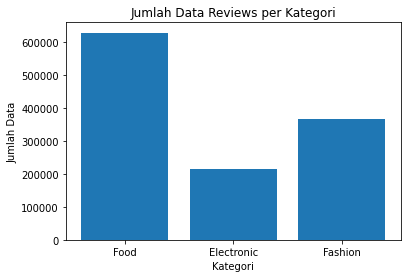

In [6]:
CATEGORY = ["Food", "Electronic", "Fashion"]
# creating the bar plot
plt.bar(CATEGORY, [len(x) for x in [df_fashion, df_food, df_electronic]])
plt.xlabel("Kategori")
plt.ylabel("Jumlah Data")
plt.title("Jumlah Data Reviews per Kategori")
plt.show()

## Labelling Data

In [7]:
# Fungsi untuk melabeli data
def labelling_data (df):
    label = []
    for rating in df['rating']:
        if rating > 3:
            label.append(1)
        elif rating <= 3:
            label.append(0)
    df['label'] = label
    return df

In [8]:
# Dataframe baru hasil pelabelan
df_food_labelled = labelling_data(df_food)
df_electronic_labelled = labelling_data(df_electronic)
df_fashion_labelled = labelling_data(df_fashion)

## Hapus Kolom Rating

In [9]:
df_food_labelled = df_food_labelled.drop('rating', axis=1)
df_electronic_labelled = df_electronic_labelled.drop('rating', axis=1)
df_fashion_labelled = df_fashion_labelled.drop('rating', axis=1)

## Visualisasi Rasio Label per Kategori

In [10]:
# Compile rasio label di setiap kategori {'kategori' : [positif, negatif]}
label_ratio = {} 
for i, ctg in enumerate([df_food_labelled, df_electronic_labelled, df_fashion_labelled]):
    count_label = ctg.label.value_counts()
    label_ratio[CATEGORY[i]] = list(count_label.values)


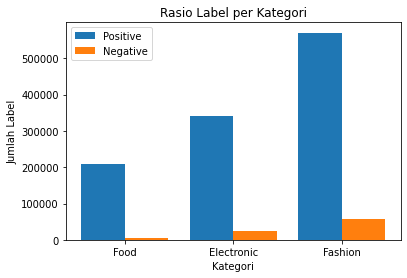

In [11]:

positive_label = [label_ratio[i][0] for i in label_ratio]
negative_label = [label_ratio[i][1] for i in label_ratio]
  
X_axis = np.arange(len(CATEGORY))
  
plt.bar(X_axis - 0.2, positive_label, 0.4, label = 'Positive')
plt.bar(X_axis + 0.2, negative_label, 0.4, label = 'Negative')
  
plt.xticks(X_axis, CATEGORY)
plt.xlabel("Kategori")
plt.ylabel("Jumlah Label")
plt.title("Rasio Label per Kategori")
plt.legend()
plt.show()

## Under Sampling Data

In [12]:
# Fungsi Undersampling
def under_sampling(df):
    df_class_0 = df[df.label == 0]
    df_class_1 = df[df.label == 1]
    count_class_0 = df_class_0.label.value_counts()[0]
    df_class_1_under = df_class_1.sample(count_class_0)
    df_test_under = pd.concat([df_class_1_under, df_class_0], axis=0)
    print('Hasil Undersampling')
    print(df_test_under.label.value_counts())
    return df_test_under
    

In [13]:
# Undersampling Data 
df_food_resampled = under_sampling(df_food_labelled)
df_electronic_resampled = under_sampling(df_electronic_labelled)
df_fashion_resampled = under_sampling(df_fashion_labelled)

Hasil Undersampling
1    5211
0    5211
Name: label, dtype: int64
Hasil Undersampling
1    24861
0    24861
Name: label, dtype: int64
Hasil Undersampling
1    56540
0    56540
Name: label, dtype: int64


## Save Data

In [14]:
def save_data(df, filename):
    PATH = '../data/interim/' + filename + '.csv'
    df.to_csv(PATH, index=False)


In [16]:
save_data(df_food_resampled, '0_food_labelled_resampled')
save_data(df_electronic_resampled, '0_electronic_labelled_resampled')
save_data(df_fashion_resampled, '0_fashion_labelled_resampled')